In [201]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import shutil
import time
import psutil

In [ ]:
import psutil



In [199]:
import numpy as np

In [ ]:
start = time.time()

In [ ]:
folderPath ="/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)"

In [ ]:
folderPath

'/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)'

In [ ]:
# Converting images to dataframe to process it
def data_prep(andesite, gneiss, marble, quartzite, rhyolite, schist):

    andesite = ["/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/andesite" + '/' +  a for a in andesite]
    gneiss = ["/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/gneiss" + '/' +  b for b in gneiss]
    marble = ["/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/marble" + '/' +  c for c in marble]
    quartzite = ["/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/quartzite" + '/' +  d for d in quartzite]
    rhyolite = ["/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/rhyolite" + '/' +  e for e in rhyolite]
    schist = ["/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/schist" + '/' +  f for f in schist]

    
    data = andesite + gneiss + marble + quartzite + rhyolite + schist

    return pd.DataFrame({'Image_Path': data})


df = (data_prep(os.listdir('/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/andesite'), os.listdir('/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/gneiss'), os.listdir('/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/marble'), os.listdir('/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/quartzite'), os.listdir('/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/rhyolite'), os.listdir('/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/schist')))
df

,Image_Path
0,/content/drive/MyDrive/Colab Notebooks/geologi...
1,/content/drive/MyDrive/Colab Notebooks/geologi...
2,/content/drive/MyDrive/Colab Notebooks/geologi...
3,/content/drive/MyDrive/Colab Notebooks/geologi...
4,/content/drive/MyDrive/Colab Notebooks/geologi...
...,...
30013,/content/drive/MyDrive/Colab Notebooks/geologi...
30014,/content/drive/MyDrive/Colab Notebooks/geologi...
30015,/content/drive/MyDrive/Colab Notebooks/geologi...
30016,/content/drive/MyDrive/Colab Notebooks/geologi...


In [ ]:
len(df)

30018

In [ ]:
import PIL

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:

df.shape

(30018, 1)

In [ ]:

df['Image_Path'][9]

'/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/andesite/T3V5A.jpg'

In [ ]:
new=df['Image_Path']
new

0        /content/drive/MyDrive/Colab Notebooks/geologi...
1        /content/drive/MyDrive/Colab Notebooks/geologi...
2        /content/drive/MyDrive/Colab Notebooks/geologi...
3        /content/drive/MyDrive/Colab Notebooks/geologi...
4        /content/drive/MyDrive/Colab Notebooks/geologi...
                               ...                        
30013    /content/drive/MyDrive/Colab Notebooks/geologi...
30014    /content/drive/MyDrive/Colab Notebooks/geologi...
30015    /content/drive/MyDrive/Colab Notebooks/geologi...
30016    /content/drive/MyDrive/Colab Notebooks/geologi...
30017    /content/drive/MyDrive/Colab Notebooks/geologi...
Name: Image_Path, Length: 30018, dtype: object

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
 IMAGE_SIZE = [224, 224]
 model = InceptionV3(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

In [ ]:
new[0]

'/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/andesite/T8PLP.jpg'

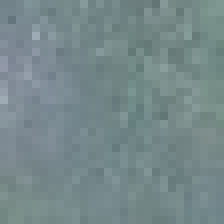

In [ ]:
img=image.load_img(new[0],target_size=(224,224))
img

In [202]:
img1=image.load_img('/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/andesite/T8PLP.jpg',target_size=(224,224,3))

In [ ]:
img2=image.load_img('/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/andesite/01ITR.jpg',target_size=(224,224,3))

In [ ]:
img3=image.load_img(new[0],target_size=(224,224,3))
img4=image.load_img(new[1],target_size=(224,224,3))

In [ ]:


x = img_to_array(img3)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)
feat1=model.predict(x) # feat for feature of the image
feat1=feat1.flatten()

np.save('feat1',feat1)

In [ ]:
feat1

array([0.92573947, 0.6471023 , 0.        , ..., 0.604858  , 1.1359198 ,
       0.        ], dtype=float32)

In [ ]:


x = img_to_array(img4)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)
feat2=model.predict(x)
feat2=feat2.flatten()
np.save('feat2',feat2)



In [ ]:
a=np.load('feat1.npy',allow_pickle=True)
b=np.load('feat2.npy',allow_pickle=True)

In [ ]:
b.shape

(51200,)

In [ ]:
from scipy.spatial import distance

In [ ]:
t = np.array(a).reshape(1,-1)
n = np.array(b).reshape(1,-1)

In [ ]:
dist=distance.euclidean(a,b)
dist

183.50543212890625

In [ ]:
feat1.shape

(51200,)

In [ ]:
np.save('file2',feat1)

In [ ]:
load=np.load('file2.npy',allow_pickle=True)
load

array([0.92573947, 0.6471023 , 0.        , ..., 0.604858  , 1.1359198 ,
       0.        ], dtype=float32)

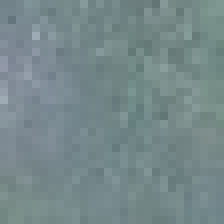

In [ ]:
img1

In [ ]:
np.save('file1',img1)

In [ ]:
np.save('file1',img1)
b=np.load('file1.npy')

In [ ]:
 b.shape

(224, 224, 3)

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


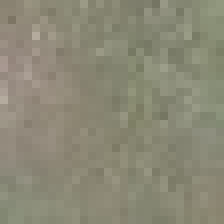

In [ ]:

import cv2

cv2_imshow(b)

In [ ]:
len(new)

30018

In [ ]:
for i in range(1000):
  print("feature"+str(i))

In [ ]:
model = InceptionV3(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

In [ ]:
from google.colab import files

In [ ]:
def get_ram_usage():
    """
    Obtains the absolute number of RAM bytes currently in use by the system.
    :returns: System RAM usage in bytes.
    :rtype: int
    """
    return int(psutil.virtual_memory().total - psutil.virtual_memory().available)

In [ ]:
import time

In [ ]:
print('login cpu usage',psutil.cpu_percent(),  ',  RAM usage is {} MB'.format(int(get_ram_usage() / 1024 / 1024)))
      print('timestamp :', time.time())

In [ ]:
def image_feature(new, model):
    # features=[]
    # img_path=[]
    log_in0=pd.DataFrame([[0,0,0,0]], columns=('feature no.','CPU usage login','RAM in MB login','timestamp login'))
    log_out0=pd.DataFrame([[0,0,0,0]], columns=('feature no.','CPU usage logout','RAM in MB logout','timestamp logout'))
    for i in range(5000):
      print('serial',i,':')
      #find RAM usage, timestamp, CPU usage
      #append in csv file "logs_in.csv"
      
      df2={'feature no.' :i,'CPU usage login':psutil.cpu_percent(),'RAM in MB login':int(get_ram_usage() / 1024 / 1024) ,'timestamp login': time.time()}
      log_in0=log_in0.append(df2,ignore_index = True)
      
      
      
      img=new[i]
      # print(img)
      img=image.load_img(img,target_size=(224,224,3))
      x = img_to_array(img)
      x=np.expand_dims(x,axis=0)
      x=preprocess_input(x)
      feat=model.predict(x)
      feature=feat.flatten()
      # features.append(feat)
      np.save('/content/drive/MyDrive/new_similarity/feature'+str(i),feature)
      
      #find RAM usage, timestamp, CPU usage
      #append in csv file "logs_out.csv"
      
      df4={'feature no.' :i,'CPU usage logout':psutil.cpu_percent(),'RAM in MB logout':int(get_ram_usage() / 1024 / 1024) ,'timestamp logout': time.time()}
      log_out0=log_out0.append(df4,ignore_index = True)
      
      
      # img_path.append(img)
    log_out0.to_csv('/content/drive/MyDrive/similarity_csv/logout0.csv')

    log_in0.to_csv('/content/drive/MyDrive/similarity_csv/login0.csv')
    return log_in #features,img_path
  

In [ ]:
log_in=image_feature(new,model)

In [ ]:
# using time module
import time

# ts stores the time in seconds
ts = time.time()

# print the current timestamp
print(ts)


1655262098.2235641


In [ ]:
# using datetime module
import datetime;

# ct stores current time
ct = datetime.datetime.now()
print("current time:-", ct)

# ts store timestamp of current time
ts = ct.timestamp()
print("timestamp:-", ts)


current time:- 2022-06-15 03:17:34.706499
timestamp:- 1655263054.706499


In [ ]:
login0=pd.read_csv('/content/drive/MyDrive/similarity_csv/login0.csv')
login0.head()

,Unnamed: 0,feature no.,CPU usage login,RAM in MB login,timestamp login
0,0,0.0,0.0,0.0,0.000000e+00
1,1,0.0,20.5,1788.0,1.655296e+09
2,2,1.0,0.0,1735.0,1.655296e+09
3,3,2.0,0.0,1735.0,1.655296e+09
4,4,3.0,50.0,1735.0,1.655296e+09


In [ ]:
login=pd.read_csv('/content/drive/MyDrive/similarity_csv/login.csv')
login.head()

,Unnamed: 0,feature no.,CPU usage login,RAM in MB login,timestamp login
0,0,0.0,0.0,0.0,0.000000e+00
1,1,5000.0,5.4,1548.0,1.655277e+09
2,2,5001.0,100.0,1548.0,1.655277e+09
3,3,5002.0,0.0,1548.0,1.655277e+09
4,4,5003.0,0.0,1548.0,1.655277e+09


In [ ]:
login2=pd.read_csv('/content/drive/MyDrive/similarity_csv/login2.csv')

login2.head()

,Unnamed: 0,feature no.,CPU usage login,RAM in MB login,timestamp login
0,0,0.0,0.0,0.0,0.000000e+00
1,1,10000.0,13.6,1922.0,1.655280e+09
2,2,10001.0,100.0,1922.0,1.655280e+09
3,3,10002.0,100.0,1922.0,1.655280e+09
4,4,10003.0,0.0,1922.0,1.655280e+09


In [ ]:
login3=pd.read_csv('/content/drive/MyDrive/similarity_csv/login3.csv')
login3.head()

,Unnamed: 0,feature no.,CPU usage login,RAM in MB login,timestamp login
0,0,0.0,0.0,0.0,0.000000e+00
1,1,20000.0,7.3,1825.0,1.655287e+09
2,2,20001.0,0.0,1825.0,1.655287e+09
3,3,20002.0,0.0,1825.0,1.655287e+09
4,4,20003.0,100.0,1825.0,1.655287e+09


In [ ]:
logout0=pd.read_csv('/content/drive/MyDrive/similarity_csv/logout0.csv')
logout=pd.read_csv('/content/drive/MyDrive/similarity_csv/logout.csv')
logout2=pd.read_csv('/content/drive/MyDrive/similarity_csv/logout2.csv')
logout3=pd.read_csv('/content/drive/MyDrive/similarity_csv/logout3.csv')





In [ ]:
login0.drop([0], axis=0, inplace=True)
login0.shape

(5000, 5)

In [ ]:

login.drop([0], axis=0, inplace=True)
login2.drop([0], axis=0, inplace=True)
login3.drop([0], axis=0, inplace=True)


In [ ]:
login0=login0.append(login, ignore_index = True)

login0.shape

(10000, 5)

In [ ]:
log_in=login0.append(login2, ignore_index = True)
log_in.shape

(20000, 5)

In [ ]:
log_in=log_in.append(login3, ignore_index = True)

In [ ]:
log_in.shape

(30000, 5)

In [ ]:
logout0.drop([0], axis=0, inplace=True)
logout.drop([0], axis=0, inplace=True)
logout2.drop([0], axis=0, inplace=True)
logout3.drop([0], axis=0, inplace=True)


In [ ]:

logout3.shape

(10000, 5)

In [ ]:
log_out=logout0.append(logout,ignore_index = True)
log_out.shape

(10000, 5)

In [ ]:
log_out=log_out.append(logout2,ignore_index = True)
log_out.shape

(20000, 5)

In [ ]:
log_out=log_out.append(logout3,ignore_index = True)
log_out.shape

(30000, 5)

In [ ]:
log_in.to_csv('/content/drive/MyDrive/similarity_csv/log_in.csv')

In [ ]:
log_in.to_csv('/content/drive/MyDrive/similarity_csv/log_in.csv')

log_out.to_csv('/content/drive/MyDrive/similarity_csv/log_out.csv')

In [ ]:
ds=pd.read_csv('/content/drive/MyDrive/similarity_csv/log_out.csv')
ds.head()

,Unnamed: 0,Unnamed: 0.1,feature no.,CPU usage logout,RAM in MB logout,timestamp logout
0,0,1,0.0,55.1,1735.0,1.655296e+09
1,1,2,1.0,55.1,1735.0,1.655296e+09
2,2,3,2.0,80.9,1735.0,1.655296e+09
3,3,4,3.0,82.4,1736.0,1.655296e+09
4,4,5,4.0,80.3,1736.0,1.655296e+09


In [ ]:
import numpy as np

In [75]:
new_feature=np.load('/content/drive/MyDrive/new_similarity/feature1003.npy',allow_pickle=True)
new_feature.shape

(51200,)

In [76]:
from scipy.spatial import distance


In [77]:
lo=np.load('/content/drive/MyDrive/new_similarity/feature3.npy',allow_pickle=True )
lo.shape

(51200,)

In [78]:
distance=distance.euclidean(new_feature,lo)

In [79]:
distance

145.63308715820312

In [82]:
temp=lo-new_feature

In [83]:
d=np.sqrt(np.dot(temp.T,temp))
d

145.63307

In [89]:
load_in=pd.DataFrame([[0,0,0,0]], columns=('feature no.','CPU usage login','RAM in MB login','timestamp login'))
load_out=pd.DataFrame([[0,0,0,0]], columns=('feature no.','CPU usage logout','RAM in MB logout','timestamp logout'))

In [73]:
def get_ram_usage():
    """
    Obtains the absolute number of RAM bytes currently in use by the system.
    :returns: System RAM usage in bytes.
    :rtype: int
    """
    return int(psutil.virtual_memory().total - psutil.virtual_memory().available)

In [91]:
new_features=np.load('/content/drive/MyDrive/new_similarity/feature1003.npy',allow_pickle=True)

dist=[]
for i in range(10):
  print(i)
  df1={'feature no.' :i,'CPU usage login':psutil.cpu_percent(),'RAM in MB login':int(get_ram_usage() / 1024 / 1024) ,'timestamp login': time.time()}
  load_in=load_in.append(df1,ignore_index = True)
      
  load=np.load('/content/drive/MyDrive/new_similarity/feature'+str(i)+'.npy',allow_pickle=True )
  temp1=new_features-load
  dis=np.sqrt(np.dot(temp1.T,temp1))


  df2={'feature no.' :i,'CPU usage logout':psutil.cpu_percent(),'RAM in MB logout':int(get_ram_usage() / 1024 / 1024) ,'timestamp logout': time.time()}
  load_out=load_out.append(df2,ignore_index = True)

  dist.append(dis)
  
  
print(dist) 
  

0
1
2
3
4
5
6
7
8
9
[140.2956, 173.04979, 124.141136, 145.63307, 110.702995, 133.56047, 139.5129, 109.651215, 97.8204, 101.09823]


In [94]:
len(dist)

10

In [95]:
type(dist)

list

In [99]:
my_array = np. array(dist)
type(my_array)

numpy.ndarray

In [104]:
my_array = np. array(dist)

np.save('/content/drive/MyDrive/similarity_csv/data.npy', my_array) 

In [105]:
new_num_arr = np.load('/content/drive/MyDrive/similarity_csv/data.npy') 

In [106]:
new_num_arr

array([140.2956  , 173.04979 , 124.141136, 145.63307 , 110.702995,
       133.56047 , 139.5129  , 109.651215,  97.8204  , 101.09823 ],
      dtype=float32)

In [ ]:
load_out.head()

,feature no.,CPU usage logout,RAM in MB logout,timestamp logout,CPU usage login,RAM in MB login,timestamp login
0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,100.0,1538.0,1.655442e+09
2,1.0,NaN,NaN,NaN,0.0,1538.0,1.655442e+09
3,2.0,NaN,NaN,NaN,0.0,1538.0,1.655442e+09
4,3.0,NaN,NaN,NaN,50.0,1538.0,1.655442e+09


In [ ]:
load_out=load_out[['CPU usage login','RAM in MB login','timestamp login']]

KeyError: ignored

In [ ]:
load_out.head()

,CPU usage logout,RAM in MB logout,timestamp logout
0,NaN,NaN,NaN
1,100.0,1538.0,1.655442e+09
2,0.0,1538.0,1.655442e+09
3,0.0,1538.0,1.655442e+09
4,50.0,1538.0,1.655442e+09


In [ ]:
load_out.rename(columns={'CPU usage login':'CPU usage logout', 'RAM in MB login':'RAM in MB logout','timestamp login':'timestamp logout'},inplace=True)

In [ ]:
load_out.head()

,CPU usage logout,RAM in MB logout,timestamp logout
0,NaN,NaN,NaN
1,100.0,1538.0,1.655442e+09
2,0.0,1538.0,1.655442e+09
3,0.0,1538.0,1.655442e+09
4,50.0,1538.0,1.655442e+09


In [ ]:
load_out.drop([0], axis=0, inplace=True)

KeyError: ignored

In [ ]:
load_out.head()

,CPU usage logout,RAM in MB logout,timestamp logout
1,100.0,1538.0,1.655442e+09
2,0.0,1538.0,1.655442e+09
3,0.0,1538.0,1.655442e+09
4,50.0,1538.0,1.655442e+09
5,0.0,1538.0,1.655442e+09


In [ ]:
load_in.drop([0], axis=0, inplace=True)

In [ ]:
load_in.head()

,feature no.,CPU usage login,RAM in MB login,timestamp login
1,0.0,18.0,1538.0,1.655442e+09
2,1.0,50.0,1538.0,1.655442e+09
3,2.0,50.0,1538.0,1.655442e+09
4,3.0,0.0,1538.0,1.655442e+09
5,4.0,0.0,1538.0,1.655442e+09


In [ ]:
feature_no =[]

In [ ]:
for i in range (10000):
  feature_no.append(i)
  

In [ ]:
len(feature_no)

10000

In [ ]:
load_out['feature no.']=feature_no

In [ ]:
load_out.head()

,CPU usage logout,RAM in MB logout,timestamp logout,feature no.
1,100.0,1538.0,1.655442e+09,0
2,0.0,1538.0,1.655442e+09,1
3,0.0,1538.0,1.655442e+09,2
4,50.0,1538.0,1.655442e+09,3
5,0.0,1538.0,1.655442e+09,4


In [ ]:
load_in.head()

,feature no.,CPU usage login,RAM in MB login,timestamp login
1,0.0,18.0,1538.0,1.655442e+09
2,1.0,50.0,1538.0,1.655442e+09
3,2.0,50.0,1538.0,1.655442e+09
4,3.0,0.0,1538.0,1.655442e+09
5,4.0,0.0,1538.0,1.655442e+09


In [ ]:
load_in.to_csv('/content/drive/MyDrive/similarity_csv/load_in.csv')

In [ ]:
load_out.to_csv('/content/drive/MyDrive/similarity_csv/load_out.csv')

In [ ]:
len(dist)

10293

In [ ]:
# What is needed exactly? (we can modify it little bit)
# 1. Function to find the features and save a npy file
# 2. Function to find the number of such npy files and a list of the filenames
# 3. Function to find the top 3 similar images,i.e. npy files
# 4. Function to read a npy file and show it as image
# 5. Code to call these functions and perform operations

# Final Code

In [206]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import shutil
import time
import psutil

In [136]:
from google.colab.patches import cv2_imshow

In [ ]:
start = time.time()

In [ ]:
folderPath ="/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)"

In [ ]:
folderPath

'/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)'

In [ ]:
# Converting images to dataframe to process it
def data_prep(andesite, gneiss, marble, quartzite, rhyolite, schist):

    andesite = ["/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/andesite" + '/' +  a for a in andesite]
    gneiss = ["/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/gneiss" + '/' +  b for b in gneiss]
    marble = ["/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/marble" + '/' +  c for c in marble]
    quartzite = ["/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/quartzite" + '/' +  d for d in quartzite]
    rhyolite = ["/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/rhyolite" + '/' +  e for e in rhyolite]
    schist = ["/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/schist" + '/' +  f for f in schist]

    
    data = andesite + gneiss + marble + quartzite + rhyolite + schist

    return pd.DataFrame({'Image_Path': data})


df = (data_prep(os.listdir('/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/andesite'), os.listdir('/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/gneiss'), os.listdir('/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/marble'), os.listdir('/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/quartzite'), os.listdir('/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/rhyolite'), os.listdir('/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/schist')))
df

,Image_Path
0,/content/drive/MyDrive/Colab Notebooks/geologi...
1,/content/drive/MyDrive/Colab Notebooks/geologi...
2,/content/drive/MyDrive/Colab Notebooks/geologi...
3,/content/drive/MyDrive/Colab Notebooks/geologi...
4,/content/drive/MyDrive/Colab Notebooks/geologi...
...,...
30013,/content/drive/MyDrive/Colab Notebooks/geologi...
30014,/content/drive/MyDrive/Colab Notebooks/geologi...
30015,/content/drive/MyDrive/Colab Notebooks/geologi...
30016,/content/drive/MyDrive/Colab Notebooks/geologi...


In [ ]:
len(df)

30018

In [ ]:
import PIL

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.shape

(30018, 1)

In [ ]:
df['Image_Path'][9]

'/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/andesite/T3V5A.jpg'

In [ ]:
new=df['Image_Path']
new

0        /content/drive/MyDrive/Colab Notebooks/geologi...
1        /content/drive/MyDrive/Colab Notebooks/geologi...
2        /content/drive/MyDrive/Colab Notebooks/geologi...
3        /content/drive/MyDrive/Colab Notebooks/geologi...
4        /content/drive/MyDrive/Colab Notebooks/geologi...
                               ...                        
30013    /content/drive/MyDrive/Colab Notebooks/geologi...
30014    /content/drive/MyDrive/Colab Notebooks/geologi...
30015    /content/drive/MyDrive/Colab Notebooks/geologi...
30016    /content/drive/MyDrive/Colab Notebooks/geologi...
30017    /content/drive/MyDrive/Colab Notebooks/geologi...
Name: Image_Path, Length: 30018, dtype: object

In [ ]:
 IMAGE_SIZE = [224, 224]
 model = InceptionV3(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
def image_feature(new, model):
    # features=[]
    # img_path=[]
    log_in0=pd.DataFrame([[0,0,0,0]], columns=('feature no.','CPU usage login','RAM in MB login','timestamp login'))
    log_out0=pd.DataFrame([[0,0,0,0]], columns=('feature no.','CPU usage logout','RAM in MB logout','timestamp logout'))
    for i in range(5000):
      print('serial',i,':')
      #find RAM usage, timestamp, CPU usage
      #append in csv file "logs_in.csv"
      
      df2={'feature no.' :i,'CPU usage login':psutil.cpu_percent(),'RAM in MB login':int(get_ram_usage() / 1024 / 1024) ,'timestamp login': time.time()}
      log_in0=log_in0.append(df2,ignore_index = True)
      
      
      
      img=new[i]
      # print(img)
      img=image.load_img(img,target_size=(224,224,3))
      x = img_to_array(img)
      x=np.expand_dims(x,axis=0)
      x=preprocess_input(x)
      feat=model.predict(x)
      feature=feat.flatten()
      # features.append(feat)
      np.save('/content/drive/MyDrive/new_similarity/feature'+str(i),feature)
      
      #find RAM usage, timestamp, CPU usage
      #append in csv file "logs_out.csv"
      
      df4={'feature no.' :i,'CPU usage logout':psutil.cpu_percent(),'RAM in MB logout':int(get_ram_usage() / 1024 / 1024) ,'timestamp logout': time.time()}
      log_out0=log_out0.append(df4,ignore_index = True)
      
      
      # img_path.append(img)
    log_out0.to_csv('/content/drive/MyDrive/similarity_csv/logout0.csv')

    log_in0.to_csv('/content/drive/MyDrive/similarity_csv/login0.csv')
    return log_in #features,img_path
  

In [ ]:
log_in=image_feature(new,model)

In [51]:
login0=pd.read_csv('/content/drive/MyDrive/similarity_csv/login0.csv')
login0.head()

,Unnamed: 0,feature no.,CPU usage login,RAM in MB login,timestamp login
0,0,0.0,0.0,0.0,0.000000e+00
1,1,0.0,20.5,1788.0,1.655296e+09
2,2,1.0,0.0,1735.0,1.655296e+09
3,3,2.0,0.0,1735.0,1.655296e+09
4,4,3.0,50.0,1735.0,1.655296e+09


In [52]:
login=pd.read_csv('/content/drive/MyDrive/similarity_csv/login.csv')
login.head()

,Unnamed: 0,feature no.,CPU usage login,RAM in MB login,timestamp login
0,0,0.0,0.0,0.0,0.000000e+00
1,1,5000.0,5.4,1548.0,1.655277e+09
2,2,5001.0,100.0,1548.0,1.655277e+09
3,3,5002.0,0.0,1548.0,1.655277e+09
4,4,5003.0,0.0,1548.0,1.655277e+09


In [53]:
login2=pd.read_csv('/content/drive/MyDrive/similarity_csv/login2.csv')

login2.head()

,Unnamed: 0,feature no.,CPU usage login,RAM in MB login,timestamp login
0,0,0.0,0.0,0.0,0.000000e+00
1,1,10000.0,13.6,1922.0,1.655280e+09
2,2,10001.0,100.0,1922.0,1.655280e+09
3,3,10002.0,100.0,1922.0,1.655280e+09
4,4,10003.0,0.0,1922.0,1.655280e+09


In [54]:
login3=pd.read_csv('/content/drive/MyDrive/similarity_csv/login3.csv')

login3.head()

,Unnamed: 0,feature no.,CPU usage login,RAM in MB login,timestamp login
0,0,0.0,0.0,0.0,0.000000e+00
1,1,20000.0,7.3,1825.0,1.655287e+09
2,2,20001.0,0.0,1825.0,1.655287e+09
3,3,20002.0,0.0,1825.0,1.655287e+09
4,4,20003.0,100.0,1825.0,1.655287e+09


In [55]:
logout0=pd.read_csv('/content/drive/MyDrive/similarity_csv/logout0.csv')
logout=pd.read_csv('/content/drive/MyDrive/similarity_csv/logout.csv')
logout2=pd.read_csv('/content/drive/MyDrive/similarity_csv/logout2.csv')
logout3=pd.read_csv('/content/drive/MyDrive/similarity_csv/logout3.csv')





In [56]:
login0.drop([0], axis=0, inplace=True)
login0.shape

(5000, 5)

In [57]:

login.drop([0], axis=0, inplace=True)
login2.drop([0], axis=0, inplace=True)
login3.drop([0], axis=0, inplace=True)


In [58]:
login0=login0.append(login, ignore_index = True)

login0.shape

(10000, 5)

In [59]:
log_in=login0.append(login2, ignore_index = True)
log_in.shape

(20000, 5)

In [60]:
log_in=log_in.append(login3, ignore_index = True)
log_in.shape

(30000, 5)

In [61]:
logout0.drop([0], axis=0, inplace=True)
logout.drop([0], axis=0, inplace=True)
logout2.drop([0], axis=0, inplace=True)
logout3.drop([0], axis=0, inplace=True)


In [62]:
log_out=logout0.append(logout,ignore_index=True)
log_out.shape

(10000, 5)

In [63]:
log_out=log_out.append(logout2,ignore_index=True)

In [64]:
log_out=log_out.append(logout3,ignore_index=True)
log_out.shape

(30000, 5)

In [65]:
log_in.to_csv('/content/drive/MyDrive/similarity_csv/log_in.csv')

log_out.to_csv('/content/drive/MyDrive/similarity_csv/log_out.csv')

In [122]:
load_in=pd.DataFrame([[0,0,0,0]], columns=('feature no.','CPU usage loadin','RAM in MB loadin','timestamp loadin'))
load_out=pd.DataFrame([[0,0,0,0]], columns=('feature no.','CPU usage loadout','RAM in MB loadout','timestamp loadout'))

In [93]:
def get_ram_usage():
    """
    Obtains the absolute number of RAM bytes currently in use by the system.
    :returns: System RAM usage in bytes.
    :rtype: int
    """
    return int(psutil.virtual_memory().total - psutil.virtual_memory().available)

In [ ]:
new_features=np.load('/content/drive/MyDrive/new_similarity/feature1003.npy',allow_pickle=True)

dist=[]
for i in range(1000):
  print(i)
  df1={'feature no.' :i,'CPU usage loadin':psutil.cpu_percent(),'RAM in MB loadin':int(get_ram_usage() / 1024 / 1024) ,'timestamp loadin': time.time()}
  load_in=load_in.append(df1,ignore_index = True)
      
  load=np.load('/content/drive/MyDrive/new_similarity/feature'+str(i)+'.npy',allow_pickle=True )
  temp1=new_features-load
  dis=np.sqrt(np.dot(temp1.T,temp1))


  df2={'feature no.' :i,'CPU usage loadout':psutil.cpu_percent(),'RAM in MB loadout':int(get_ram_usage() / 1024 / 1024) ,'timestamp loadout': time.time()}
  load_out=load_out.append(df2,ignore_index = True)

  dist.append(dis)
  
  
print(dist) 
my_array = np. array(dist)
np.save('/content/drive/MyDrive/similarity_csv/dist_data.npy', my_array) 
  

In [124]:
dist_data = np.load('/content/drive/MyDrive/similarity_csv/dist_data.npy') 

In [ ]:
dist_data

In [125]:
dist_data.shape

(1000,)

In [126]:
load_in.head()

,feature no.,CPU usage loadin,RAM in MB loadin,timestamp loadin
0,0.0,0.0,0.0,0.000000e+00
1,0.0,3.6,1777.0,1.656135e+09
2,1.0,0.0,1777.0,1.656135e+09
3,2.0,100.0,1777.0,1.656135e+09
4,3.0,0.0,1777.0,1.656135e+09


In [128]:
load_in.drop([0], axis=0, inplace=True)
load_in.head()

,feature no.,CPU usage loadin,RAM in MB loadin,timestamp loadin
1,0.0,3.6,1777.0,1.656135e+09
2,1.0,0.0,1777.0,1.656135e+09
3,2.0,100.0,1777.0,1.656135e+09
4,3.0,0.0,1777.0,1.656135e+09
5,4.0,50.0,1777.0,1.656135e+09


In [131]:
load_out.head()

,feature no.,CPU usage loadout,RAM in MB loadout,timestamp loadout
1,0.0,100.0,1777.0,1.656135e+09
2,1.0,100.0,1777.0,1.656135e+09
3,2.0,0.0,1777.0,1.656135e+09
4,3.0,0.0,1777.0,1.656135e+09
5,4.0,0.0,1777.0,1.656135e+09


In [132]:
load_out.shape

(1000, 4)

In [133]:
load_in.to_csv('/content/drive/MyDrive/similarity_csv/load_in.csv')

load_out.to_csv('/content/drive/MyDrive/similarity_csv/load_out.csv')

In [212]:
data=dist_data
data.shape

(1000,)

In [187]:
type(data)

numpy.ndarray

In [203]:
img=image.load_img(new[942],target_size=(224,224))
np.save('file1',img)
b=np.load('file1.npy')
b.shape

(224, 224, 3)

942
(224, 224, 3)


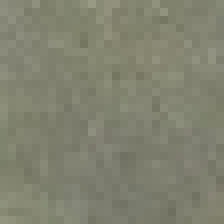

(999,)
922
(224, 224, 3)


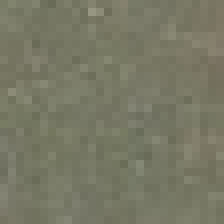

(998,)
659
(224, 224, 3)


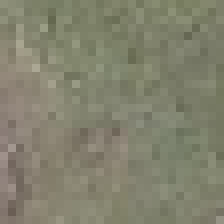

(997,)


In [213]:
for i in range(3):
  idx=data.argmin()
  index=[idx]
  print(idx)
  img=image.load_img(new[idx],target_size=(224,224))
  np.save('img',img)
  imag=np.load('img.npy')
  print(imag.shape)
  cv2_imshow(imag)
  data=np.delete(data,index)

  print(data.shape)

In [150]:
im=np.load('/content/drive/MyDrive/new_similarity/feature1003.npy',allow_pickle=True)

In [154]:
new[1003]

'/content/drive/MyDrive/Colab Notebooks/geological_similarity (2)/andesite/LTECD.jpg'